In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, MaxPooling2D
import cv2
import matplotlib.pyplot as plt 

In [ ]:
# download fer2013 from Kaggle

import kagglehub

# download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

In [2]:
import os

train_folder = r'C:\Users\User\Desktop\codes\fer2013dataset\kagglehub\datasets\msambare\fer2013\versions\1\train'
print(os.listdir(train_folder))


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [3]:
class_names = os.listdir(train_folder)
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [4]:
X_train = []
X_test = []
y_train = []
y_test = []

In [5]:
for label, i in enumerate(class_names):

    file_path = os.path.join(train_folder, i)
    for img in os.listdir(file_path):
        image_array = cv2.imread(os.path.join(file_path, img), cv2.IMREAD_GRAYSCALE)
        X_train.append(image_array)
        y_train.append(label)

In [6]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=len(class_names))


In [9]:
print(len(X_train))
print(X_train[0].shape)   
print(len(y_train))
print(y_train[0].shape)

28709
(48, 48)
28709
(7,)


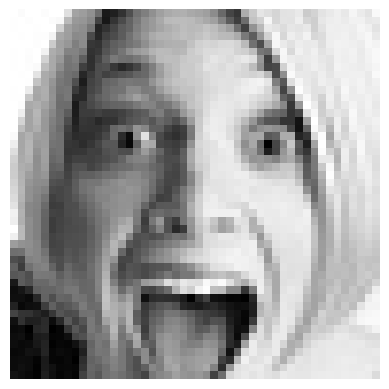

[0. 0. 0. 0. 0. 0. 1.]


In [12]:
plt.imshow((X_train[27000]), cmap= 'gray')
plt.axis('off')
plt.show()
print(y_train[27000])

In [13]:
test_folder = r'C:\Users\User\Desktop\codes\fer2013dataset\kagglehub\datasets\msambare\fer2013\versions\1\test'


In [14]:
for label, i in enumerate(class_names):
    
    file_path = os.path.join(test_folder, i)
    for img in os.listdir(file_path):
        img_array = cv2.imread(os.path.join(file_path, img), cv2.IMREAD_GRAYSCALE)
        X_test.append(img_array)
        y_test.append(label)

        

In [15]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [16]:
from keras.utils import to_categorical
y_test = to_categorical(y_test, num_classes=len(class_names))


In [17]:
print(len(X_test))
print(X_test[0].shape)   
print(len(y_test))
print(y_test[0].shape)

7178
(48, 48)
7178
(7,)


# Preprocessing

In [18]:
X_train = X_train.reshape((-1, 48, 48, 1)).astype('float32') / 255
X_test = X_test.reshape((-1, 48, 48, 1)).astype('float32') / 255

In [19]:
print('shape of X_train:', X_train.shape)
print('shape of X_test:', X_test.shape)

print(X_train.dtype)

shape of X_train: (28709, 48, 48, 1)
shape of X_test: (7178, 48, 48, 1)
float32


# CNN structure

In [20]:
model = Sequential([
        # Block 1
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape = X_train[0].shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Block 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Block 3
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Block 4
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Fully Connected
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(7, activation='softmax')
    ])
    

In [22]:

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='accuracy',
            factor=0.5,
            patience=5,
            min_lr=1e-7,
            verbose=1
        )

# Compile the model

In [21]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate= 0.001),
              loss= keras.losses.categorical_crossentropy,
              metrics= ['accuracy'])

# Training_step

In [24]:
history = model.fit(X_train, y_train, batch_size= 64, epochs= 10, callbacks= [reduce_lr], verbose= 1)

Epoch 1/10
449/449 [==============================] - 51s 113ms/step - loss: 1.7832 - accuracy: 0.3342 - lr: 0.0010
Epoch 2/10
449/449 [==============================] - 53s 117ms/step - loss: 1.4528 - accuracy: 0.4411 - lr: 0.0010
Epoch 3/10
449/449 [==============================] - 54s 120ms/step - loss: 1.3021 - accuracy: 0.5045 - lr: 0.0010
Epoch 4/10
449/449 [==============================] - 52s 115ms/step - loss: 1.2217 - accuracy: 0.5359 - lr: 0.0010
Epoch 5/10
449/449 [==============================] - 50s 112ms/step - loss: 1.1684 - accuracy: 0.5597 - lr: 0.0010
Epoch 6/10
449/449 [==============================] - 53s 117ms/step - loss: 1.1202 - accuracy: 0.5782 - lr: 0.0010
Epoch 7/10
449/449 [==============================] - 52s 117ms/step - loss: 1.0808 - accuracy: 0.5946 - lr: 0.0010
Epoch 8/10
449/449 [==============================] - 52s 115ms/step - loss: 1.0442 - accuracy: 0.6113 - lr: 0.0010
Epoch 9/10
449/449 [==============================] - 50s 112ms/step - l

In [25]:
model.evaluate(X_test, y_test)

225/225 [==============================] - 5s 21ms/step - loss: 1.2599 - accuracy: 0.5656


[1.2598669528961182, 0.5656171441078186]